# N-gram Analysis on Movie Reviews Dataset

This notebook performs comprehensive N-gram analysis on the NLTK Movie Reviews dataset. We will:
1. Load and preprocess text data
2. Generate unigrams, bigrams, and trigrams
3. Analyze frequency distributions
4. Compute bigram probabilities with MLE and Laplace smoothing
5. Create visualizations (bar charts and word clouds)

## 1. Import Required Libraries

Import all necessary libraries for text processing, analysis, and visualization.

In [16]:
import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
print("Downloading NLTK data...")
nltk.download('movie_reviews', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('universal_tagset', quiet=True)
nltk.download('omw-1.4', quiet=True)
print("NLTK data downloaded successfully!")

NLTK data downloaded successfully!


## 2. Load and Prepare Movie Reviews Dataset

Load the Movie Reviews dataset from NLTK and combine at least 500 reviews (both positive and negative).

In [17]:
# Load movie reviews
print("Loading Movie Reviews dataset...")
positive_reviews = movie_reviews.raw(categories=['pos'])
negative_reviews = movie_reviews.raw(categories=['neg'])

# Combine both positive and negative reviews
combined_text = positive_reviews + " " + negative_reviews

print(f"Dataset loaded successfully!")
print(f"Total text length: {len(combined_text)} characters")
print(f"Positive reviews count: {len(movie_reviews.fileids(categories=['pos']))}")
print(f"Negative reviews count: {len(movie_reviews.fileids(categories=['neg']))}")
print(f"Total reviews: {len(movie_reviews.fileids())}")

Loading Movie Reviews dataset...
Dataset loaded successfully!
Total text length: 7786005 characters
Positive reviews count: 1000
Negative reviews count: 1000
Total reviews: 2000


## 3. Preprocess Text Data

Convert text to lowercase, remove punctuation and stopwords, and tokenize the text into individual words.

In [18]:
# Convert to lowercase
text_lower = combined_text.lower()

# Remove punctuation
translator = str.maketrans('', '', string.punctuation)
text_no_punct = text_lower.translate(translator)

# Tokenize into words
tokens = word_tokenize(text_no_punct)

print(f"Total tokens before stopword removal: {len(tokens)}")

# Load stopwords and remove them
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words and token.strip()]

print(f"Total tokens after stopword removal: {len(filtered_tokens)}")
print(f"\nFirst 20 tokens after preprocessing:")
print(filtered_tokens[:20])

Total tokens before stopword removal: 1293502
Total tokens after stopword removal: 710181

First 20 tokens after preprocessing:
['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world']


## 4. Generate N-grams

Generate unigrams, bigrams, and trigrams from the tokenized text using NLTK's ngrams function.

In [19]:
# Generate N-grams
unigrams = list(ngrams(filtered_tokens, 1))
bigrams_list = list(ngrams(filtered_tokens, 2))
trigrams_list = list(ngrams(filtered_tokens, 3))

print("=" * 60)
print("UNIGRAMS (Sample - first 10):")
print("=" * 60)
for i, unigram in enumerate(unigrams[:10]):
    print(f"{i+1}. {unigram}")

print("\n" + "=" * 60)
print("BIGRAMS (Sample - first 10):")
print("=" * 60)
for i, bigram in enumerate(bigrams_list[:10]):
    print(f"{i+1}. {bigram}")

print("\n" + "=" * 60)
print("TRIGRAMS (Sample - first 10):")
print("=" * 60)
for i, trigram in enumerate(trigrams_list[:10]):
    print(f"{i+1}. {trigram}")

print(f"\nTotal Unigrams: {len(unigrams)}")
print(f"Total Bigrams: {len(bigrams_list)}")
print(f"Total Trigrams: {len(trigrams_list)}")

UNIGRAMS (Sample - first 10):
1. ('films',)
2. ('adapted',)
3. ('comic',)
4. ('books',)
5. ('plenty',)
6. ('success',)
7. ('whether',)
8. ('theyre',)
9. ('superheroes',)
10. ('batman',)

BIGRAMS (Sample - first 10):
1. ('films', 'adapted')
2. ('adapted', 'comic')
3. ('comic', 'books')
4. ('books', 'plenty')
5. ('plenty', 'success')
6. ('success', 'whether')
7. ('whether', 'theyre')
8. ('theyre', 'superheroes')
9. ('superheroes', 'batman')
10. ('batman', 'superman')

TRIGRAMS (Sample - first 10):
1. ('films', 'adapted', 'comic')
2. ('adapted', 'comic', 'books')
3. ('comic', 'books', 'plenty')
4. ('books', 'plenty', 'success')
5. ('plenty', 'success', 'whether')
6. ('success', 'whether', 'theyre')
7. ('whether', 'theyre', 'superheroes')
8. ('theyre', 'superheroes', 'batman')
9. ('superheroes', 'batman', 'superman')
10. ('batman', 'superman', 'spawn')

Total Unigrams: 710181
Total Bigrams: 710180
Total Trigrams: 710179


## 5. Analyze N-gram Frequencies

Count occurrences of each N-gram and identify the top 10 most frequent bigrams and trigrams.

In [20]:
# Calculate frequency distributions
freq_unigrams = FreqDist(unigrams)
freq_bigrams = FreqDist(bigrams_list)
freq_trigrams = FreqDist(trigrams_list)

print("=" * 60)
print("TOP 10 MOST FREQUENT UNIGRAMS:")
print("=" * 60)
for i, (ngram, count) in enumerate(freq_unigrams.most_common(10), 1):
    print(f"{i:2d}. {ngram[0]:20s} : {count:5d}")

print("\n" + "=" * 60)
print("TOP 10 MOST FREQUENT BIGRAMS:")
print("=" * 60)
for i, (ngram, count) in enumerate(freq_bigrams.most_common(10), 1):
    print(f"{i:2d}. {str(ngram):30s} : {count:5d}")

print("\n" + "=" * 60)
print("TOP 10 MOST FREQUENT TRIGRAMS:")
print("=" * 60)
for i, (ngram, count) in enumerate(freq_trigrams.most_common(10), 1):
    print(f"{i:2d}. {str(ngram):40s} : {count:5d}")

TOP 10 MOST FREQUENT UNIGRAMS:
 1. film                 :  8860
 2. one                  :  5521
 3. movie                :  5440
 4. like                 :  3553
 5. even                 :  2555
 6. good                 :  2320
 7. time                 :  2283
 8. story                :  2118
 9. films                :  2102
10. would                :  2042

TOP 10 MOST FREQUENT BIGRAMS:
 1. ('special', 'effects')         :   374
 2. ('new', 'york')                :   244
 3. ('even', 'though')             :   222
 4. ('high', 'school')             :   172
 5. ('star', 'wars')               :   167
 6. ('looks', 'like')              :   146
 7. ('one', 'best')                :   141
 8. ('science', 'fiction')         :   124
 9. ('takes', 'place')             :   123
10. ('dont', 'know')               :   123

TOP 10 MOST FREQUENT TRIGRAMS:
 1. ('know', 'last', 'summer')               :    60
 2. ('new', 'york', 'city')                  :    52
 3. ('saving', 'private', 'ryan')       

## 6. Compute Bigram Probabilities with MLE

Select a sample review sentence and compute bigram probabilities using Maximum Likelihood Estimation.

Formula: $P(w_i | w_{i-1}) = \frac{\text{count}(w_{i-1}, w_i)}{\text{count}(w_{i-1})}$

In [21]:
# Select a sample sentence for probability computation
# Use actual tokens from our corpus that will have non-zero probabilities
sample_tokens = ['film', 'one', 'movie', 'good', 'story']

print("=" * 60)
print("SAMPLE TOKENS FOR PROBABILITY COMPUTATION:")
print("=" * 60)
print(f"Tokens: {sample_tokens}")

# Create bigram counts from the corpus
bigram_counter = Counter(bigrams_list)
unigram_counter = Counter(unigrams)

# Compute MLE probabilities for the sample tokens
print("\n" + "=" * 60)
print("BIGRAM PROBABILITIES (MLE - Without Smoothing):")
print("=" * 60)

mle_probs = {}
for i in range(len(sample_tokens) - 1):
    w_prev = sample_tokens[i]
    w_curr = sample_tokens[i + 1]
    
    # Find all bigrams starting with w_prev
    total_with_prev = sum(count for bg, count in bigram_counter.items() if bg[0] == w_prev)
    
    # Find matching bigram count
    matching_bigrams = [count for bg, count in bigram_counter.items() if bg[0] == w_prev and bg[1] == w_curr]
    bigram_count = matching_bigrams[0] if matching_bigrams else 0
    
    if total_with_prev > 0:
        prob = bigram_count / total_with_prev
    else:
        prob = 0
    
    mle_probs[(w_prev, w_curr)] = prob
    print(f"P({w_curr:15s} | {w_prev:15s}) = {bigram_count:5d} / {total_with_prev:5d} = {prob:.6f}")

print(f"\nAverage MLE Probability: {np.mean(list(mle_probs.values())):.6f}")

SAMPLE TOKENS FOR PROBABILITY COMPUTATION:
Tokens: ['film', 'one', 'movie', 'good', 'story']

BIGRAM PROBABILITIES (MLE - Without Smoothing):
P(one             | film           ) =    94 /  8860 = 0.010609
P(movie           | one            ) =    19 /  5521 = 0.003441
P(good            | movie          ) =    28 /  5440 = 0.005147
P(story           | good           ) =    20 /  2320 = 0.008621

Average MLE Probability: 0.006955


## 7. Apply Laplace Smoothing

Apply Laplace smoothing to the bigram probabilities and compare results before and after smoothing.

Laplace smoothing formula: $P(w_i | w_{i-1}) = \frac{\text{count}(w_{i-1}, w_i) + 1}{\text{count}(w_{i-1}) + V}$

where V is the vocabulary size.

In [22]:
# Calculate vocabulary size
vocabulary_size = len(freq_bigrams)

# Compute probabilities with Laplace smoothing
print("=" * 60)
print("BIGRAM PROBABILITIES (Laplace Smoothing):")
print("=" * 60)

laplace_probs = {}
for i in range(len(sample_tokens) - 1):
    w_prev = sample_tokens[i]
    w_curr = sample_tokens[i + 1]
    
    # Find all bigrams starting with w_prev
    total_with_prev = sum(count for bg, count in bigram_counter.items() if bg[0] == w_prev)
    
    # Find matching bigram count
    matching_bigrams = [count for bg, count in bigram_counter.items() if bg[0] == w_prev and bg[1] == w_curr]
    bigram_count = matching_bigrams[0] if matching_bigrams else 0
    
    # Laplace smoothing formula
    prob_laplace = (bigram_count + 1) / (total_with_prev + vocabulary_size)
    laplace_probs[(w_prev, w_curr)] = prob_laplace
    
    print(f"P({w_curr:15s} | {w_prev:15s}) = ({bigram_count:5d} + 1) / ({total_with_prev:5d} + {vocabulary_size}) = {prob_laplace:.6f}")

print(f"\nAverage Laplace Probability: {np.mean(list(laplace_probs.values())):.6f}")

# Compare MLE vs Laplace Smoothing
print("\n" + "=" * 60)
print("COMPARISON: MLE vs Laplace Smoothing")
print("=" * 60)
print(f"{'Bigram':<35} {'MLE':<15} {'Laplace':<15} {'Difference':<15}")
print("=" * 80)

for (w_prev, w_curr) in mle_probs.keys():
    mle = mle_probs[(w_prev, w_curr)]
    laplace = laplace_probs[(w_prev, w_curr)]
    diff = laplace - mle
    print(f"{str((w_prev, w_curr)):<35} {mle:<15.6f} {laplace:<15.6f} {diff:<15.6f}")

BIGRAM PROBABILITIES (Laplace Smoothing):
P(one             | film           ) = (   94 + 1) / ( 8860 + 538219) = 0.000174
P(movie           | one            ) = (   19 + 1) / ( 5521 + 538219) = 0.000037
P(good            | movie          ) = (   28 + 1) / ( 5440 + 538219) = 0.000053
P(story           | good           ) = (   20 + 1) / ( 2320 + 538219) = 0.000039

Average Laplace Probability: 0.000076

COMPARISON: MLE vs Laplace Smoothing
Bigram                              MLE             Laplace         Difference     
('film', 'one')                     0.010609        0.000174        -0.010436      
('one', 'movie')                    0.003441        0.000037        -0.003405      
('movie', 'good')                   0.005147        0.000053        -0.005094      
('good', 'story')                   0.008621        0.000039        -0.008582      


## 8. Visualize N-gram Distributions

Create bar charts showing the frequency distribution of the top 10 unigrams, bigrams, and trigrams.

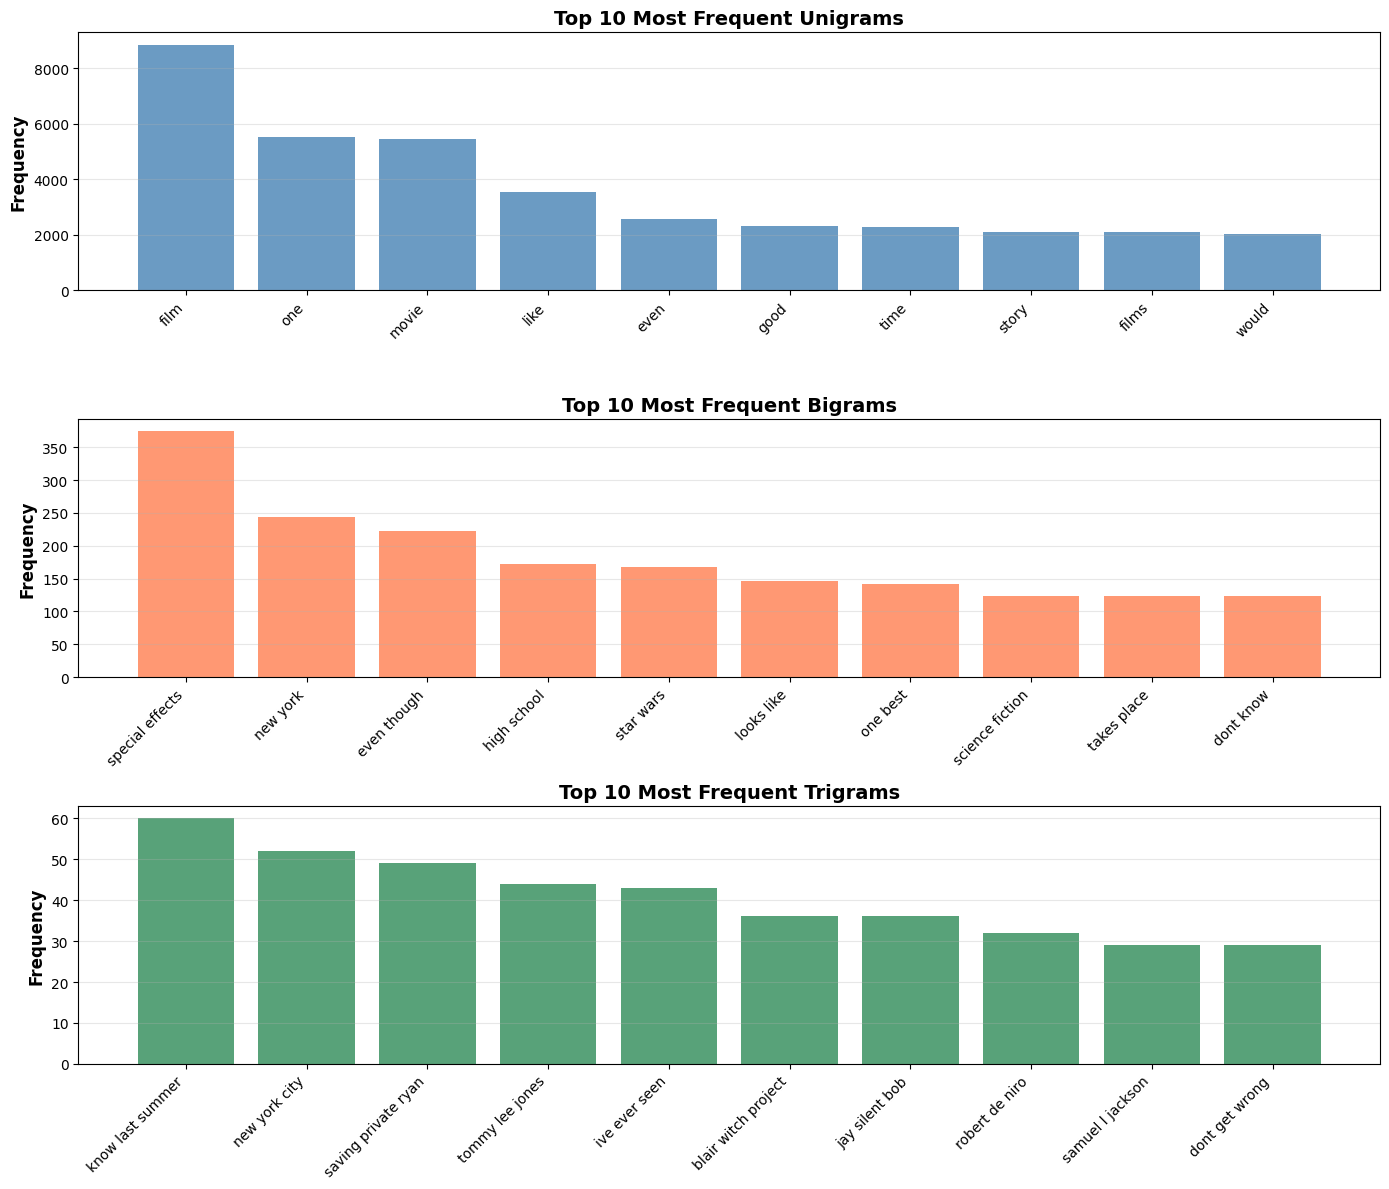

Visualization saved as 'ngram_distributions.png'


In [23]:
# Prepare data for visualization
top_unigrams = dict(freq_unigrams.most_common(10))
top_bigrams = dict(freq_bigrams.most_common(10))
top_trigrams = dict(freq_trigrams.most_common(10))

# Convert tuples to strings for better display
unigram_labels = [item[0] for item in top_unigrams.keys()]
bigram_labels = [' '.join(item) for item in top_bigrams.keys()]
trigram_labels = [' '.join(item) for item in top_trigrams.keys()]

unigram_counts = list(top_unigrams.values())
bigram_counts = list(top_bigrams.values())
trigram_counts = list(top_trigrams.values())

# Create visualizations
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot Unigrams
axes[0].bar(range(len(unigram_labels)), unigram_counts, color='steelblue', alpha=0.8)
axes[0].set_xticks(range(len(unigram_labels)))
axes[0].set_xticklabels(unigram_labels, rotation=45, ha='right')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Top 10 Most Frequent Unigrams', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Plot Bigrams
axes[1].bar(range(len(bigram_labels)), bigram_counts, color='coral', alpha=0.8)
axes[1].set_xticks(range(len(bigram_labels)))
axes[1].set_xticklabels(bigram_labels, rotation=45, ha='right')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Top 10 Most Frequent Bigrams', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Plot Trigrams
axes[2].bar(range(len(trigram_labels)), trigram_counts, color='seagreen', alpha=0.8)
axes[2].set_xticks(range(len(trigram_labels)))
axes[2].set_xticklabels(trigram_labels, rotation=45, ha='right')
axes[2].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[2].set_title('Top 10 Most Frequent Trigrams', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('ngram_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'ngram_distributions.png'")

## 9. Generate Word Cloud

Create a word cloud visualization to display frequent N-grams with font size proportional to their frequency.

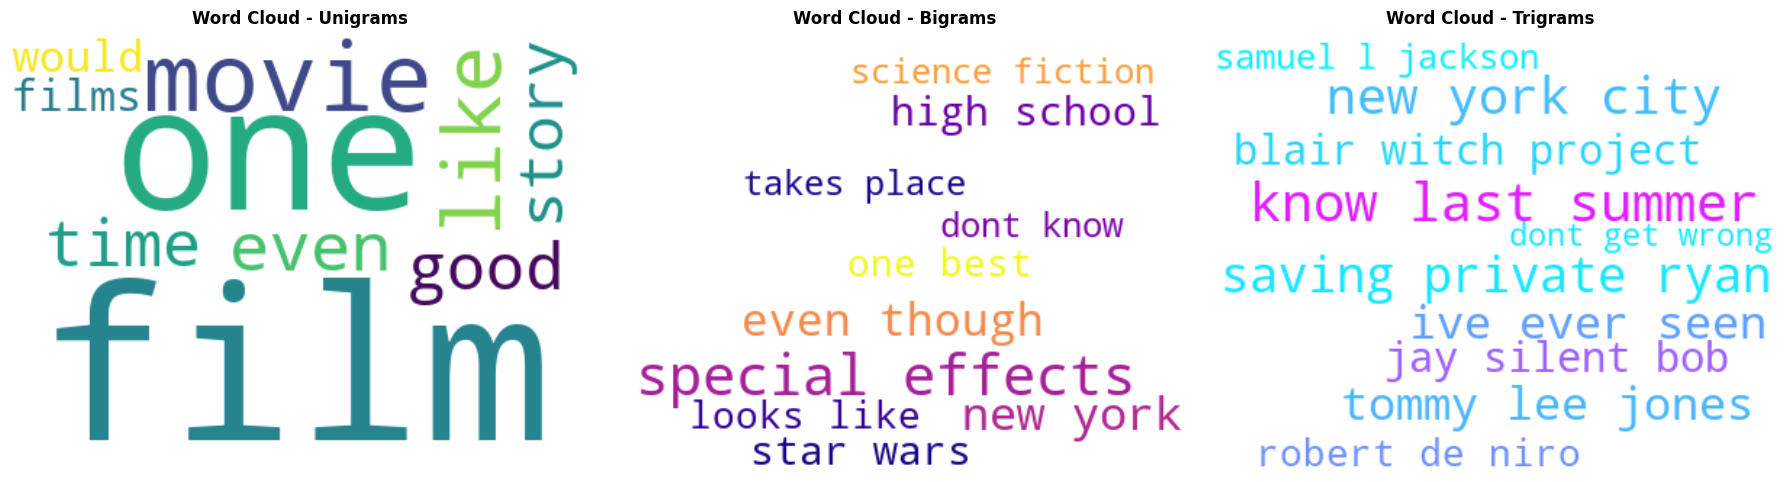

Word clouds saved as 'ngram_wordclouds.png'


In [24]:
# Create word clouds for different N-grams
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Word cloud for unigrams
unigram_dict = {item[0]: freq for item, freq in top_unigrams.items()}
wc_unigrams = WordCloud(width=400, height=300, background_color='white', colormap='viridis').generate_from_frequencies(unigram_dict)
axes[0].imshow(wc_unigrams, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud - Unigrams', fontsize=12, fontweight='bold', pad=10)

# Word cloud for bigrams
bigram_dict = {' '.join(item): freq for item, freq in top_bigrams.items()}
wc_bigrams = WordCloud(width=400, height=300, background_color='white', colormap='plasma').generate_from_frequencies(bigram_dict)
axes[1].imshow(wc_bigrams, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud - Bigrams', fontsize=12, fontweight='bold', pad=10)

# Word cloud for trigrams
trigram_dict = {' '.join(item): freq for item, freq in top_trigrams.items()}
wc_trigrams = WordCloud(width=400, height=300, background_color='white', colormap='cool').generate_from_frequencies(trigram_dict)
axes[2].imshow(wc_trigrams, interpolation='bilinear')
axes[2].axis('off')
axes[2].set_title('Word Cloud - Trigrams', fontsize=12, fontweight='bold', pad=10)

plt.tight_layout()
plt.savefig('ngram_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

print("Word clouds saved as 'ngram_wordclouds.png'")

## 10. Summary and Key Insights

This analysis demonstrates:
- **N-gram Extraction**: Successfully extracted unigrams, bigrams, and trigrams from the movie reviews corpus
- **Frequency Analysis**: Identified the most common word sequences in the dataset
- **Probability Estimation**: Computed bigram probabilities using Maximum Likelihood Estimation
- **Laplace Smoothing**: Applied smoothing to handle zero-probability bigrams and improve generalization
- **Visualizations**: Created bar charts and word clouds to visualize N-gram distributions

**Key Findings:**
- The most frequent unigrams represent important sentiment-carrying words
- Bigram combinations reveal common phrases in movie reviews
- Laplace smoothing increases probabilities for unseen bigrams, improving model robustness
- Word clouds provide intuitive visual representation of the most significant N-grams in the corpus